In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import integrate
sym.init_printing(use_unicode=True)

In [2]:
n = 10
Roots,Weights = np.polynomial.laguerre.laggauss(n)
Roots

array([ 0.13779347,  0.72945455,  1.8083429 ,  3.4014337 ,  5.55249614,
        8.33015275, 11.84378584, 16.27925783, 21.99658581, 29.92069701])

In [3]:
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)

In [4]:
def GetLaguerre(n,x,y):

    y = sym.exp(-x)*x**n
    
    poly = sym.exp(x)*sym.diff(y,x,n)/( np.math.factorial(n) )
    
    return poly

In [5]:
Laguerre = []

for i in range(n+1):
    
    Poly = GetLaguerre(i,x,y)
    Laguerre.append(Poly)

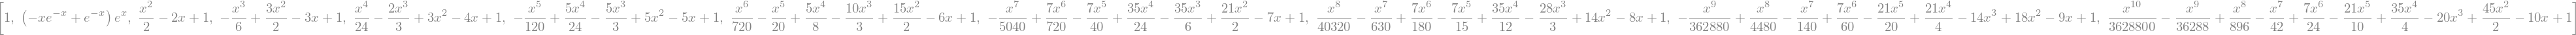

In [6]:
Laguerre

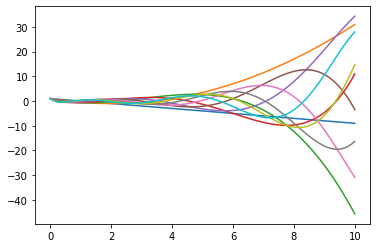

In [7]:
_x = np.linspace(0,10,100)

for i, p in enumerate(Laguerre):
    if i != 0:
        pn = sym.lambdify([x],p,'numpy')
        plt.plot(_x,pn(_x))

In [8]:
f1 = lambda x: np.cos(x)

In [9]:
I = np.sum( f1(Roots)*Weights )
I

In [10]:
f2 = lambda x: np.exp(-x)*np.cos(x)

In [11]:
integrate.quad(f2,0,np.inf)

# Hermite

In [12]:
Roots, Weights = np.polynomial.hermite.hermgauss(n)

In [13]:
def GetHermite(n,x,y):
      
    y = sym.exp(-x**2)
    
    poly = (-1)**n*sym.exp(x**2)*sym.diff(y,x,n)
    
    return poly

In [14]:
Hermite = []

for i in range(n+1):
    
    Poly = GetHermite(i,x,y)
    Hermite.append(Poly)

In [15]:
Hermite

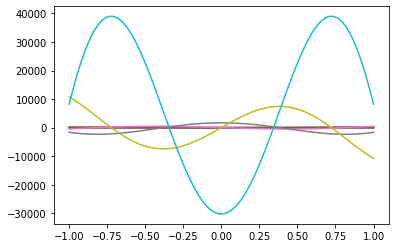

In [16]:
_x = np.linspace(-1,1,100)

for i, p in enumerate(Hermite):
    if i != 0:
        pn = sym.lambdify([x],p,'numpy')
        plt.plot(_x,pn(_x))

In [17]:
f = lambda x: 1/np.sqrt(np.pi) * 2 * x**4

In [18]:
np.sum(f(Roots)*Weights)

In [19]:
f2 = lambda x: 1/np.sqrt(np.pi) * 2 * x**4 * np.exp(-x**2)

In [20]:
integrate.quad(f2,-np.inf,np.inf)

In [24]:
# Integración de la distribucion de Maxwell
K = 2*np.pi/(np.pi**(3/2))
f = lambda v: v**2 #* np.exp(-v**2)
K

In [26]:
I = K*np.sum(Weights*f(Roots))
I 